In [110]:
import numpy as np
from tensorflow import keras
from keras.constraints import max_norm
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
#from np_utils import to_categorical
from keras.datasets import cifar10
import matplotlib.pyplot as plt 
import seaborn as sns

In [28]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_test.shape

(10000, 32, 32, 3)

In [29]:
y_train[0]

array([6], dtype=uint8)

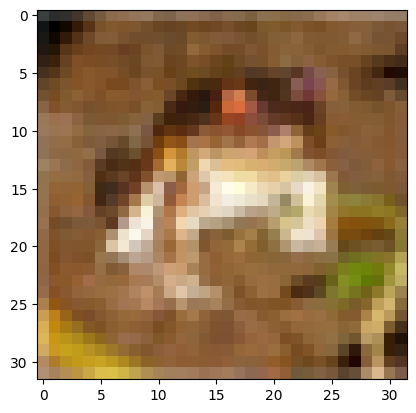

In [30]:
plt.imshow(x_train[0])

In [31]:
# Normalize the input from 0-255 to between 0 and 1 by dividing by 255
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [32]:
# One-hot encode outputs

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [33]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [34]:
class_num = y_test.shape[1]  #10

In [35]:
# from 2 dimension
x_train.shape[1:]

(32, 32, 3)

Building the model

In [71]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation ='relu', input_shape=x_train.shape[1:]))
model.add(keras.layers.BatchNormalization())

model.add(Dropout(0,2))

model.add(Conv2D(64, (3,3), padding='same', activation ='relu'))
model.add(keras.layers.BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(0,2))


model.add(Conv2D(64, (3,3), padding='same', activation ='relu'))
model.add(keras.layers.BatchNormalization())

model.add(MaxPool2D())
model.add(Dropout(0,2))

model.add(Conv2D(128, (3,3), padding='same', activation ='relu'))
model.add(keras.layers.BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(0,2))

model.add(Flatten())
model.add(keras.layers.BatchNormalization())
model.add(Dropout(0,2))

model.add(Dense(32, activation='relu'))
model.add(Dense(class_num, activation='softmax'))
# softmax: 0: isn't max value, 1: is max value


/Users/taktakro/Desktop/DeepLearningProjects/venv3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [72]:
model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

In [73]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │        65,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 197,226 (770.41 KB)

 Trainable params: 196,650 (768.16 KB)

 Non-trainable params: 576 (2.25 KB)

In [74]:
hist = model.fit(x_train, y_train, epochs= 10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 72ms/step - accuracy: 0.4409 - loss: 1.5861 - val_accuracy: 0.5989 - val_loss: 1.1664
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 71ms/step - accuracy: 0.7057 - loss: 0.8392 - val_accuracy: 0.7109 - val_loss: 0.8481
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 70ms/step - accuracy: 0.7757 - loss: 0.6400 - val_accuracy: 0.7347 - val_loss: 0.7795
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 68ms/step - accuracy: 0.8209 - loss: 0.5152 - val_accuracy: 0.7666 - val_loss: 0.6982
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 68ms/step - accuracy: 0.8500 - loss: 0.4260 - val_accuracy: 0.7588 - val_loss: 0.7529
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 67ms/step - accuracy: 0.8779 - loss: 0.3484 - val_accuracy: 0.7670 - val_loss: 0.7618
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 68ms/step - accuracy: 0.9032 - loss: 0.2792 - val_accuracy: 0.7501 - val_loss: 0.8592
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 68ms/step - accuracy: 0.9209 - loss: 0.2261 - 

without dropout and normalization: 
val_accuracy: 0.7613 - val_loss: 0.8722
Total params: 196,074 (765.91 KB)

In [78]:
for key, val in hist.history.items():
    print(key)

accuracy
loss
val_accuracy
val_loss


<Axes: >

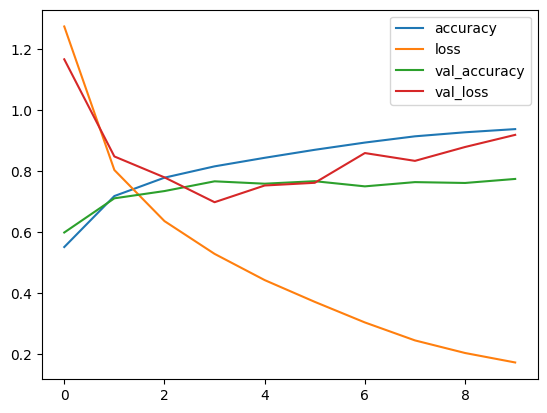

In [79]:
import pandas as pd
pd.DataFrame(hist.history).plot()

Result: overfitting because of val_accuracy < accuracy and val_loss > loss
Resolve: more Data - DropOut - batchNormalization 

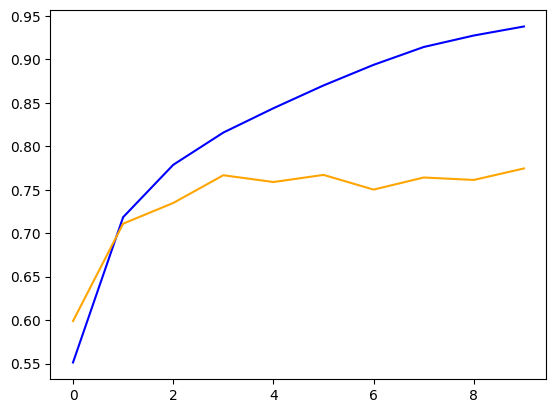

In [81]:
plt.plot(hist.history['accuracy'], color='blue')
plt.plot(hist.history['val_accuracy'], color='orange')

In [87]:
model.save('CNN_cifar10.h5')

In [88]:
model2 = load_model('CNN_cifar10.h5')

In [95]:
labels = ['airplane', 'automobile', 'bird', 'cat' , 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [101]:
model2.predict(x_test[0:10])[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([1.25354385e-08, 9.45477252e-10, 2.39315750e-06, 9.99675691e-01,
       2.58507964e-04, 3.32173549e-05, 3.01462605e-05, 1.46924126e-08,
       1.52150843e-08, 1.01403614e-08], dtype=float32)

In [102]:
print(labels[3]) 

cat


In [103]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [107]:
# predicting test data

prediction = model.predict(x_test)
prediction = np.argmax(prediction, axis = 1)

y_test = np.argmax(y_test, axis = 1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


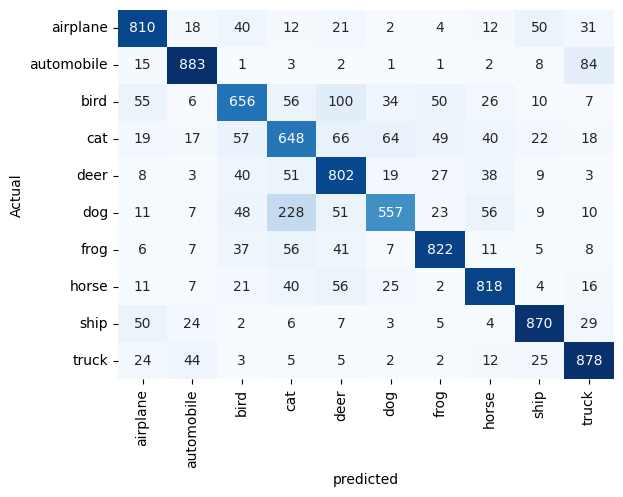

In [112]:
#creating confusion matrix

cm = confusion_matrix(y_test, prediction)

plt.Figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels= labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

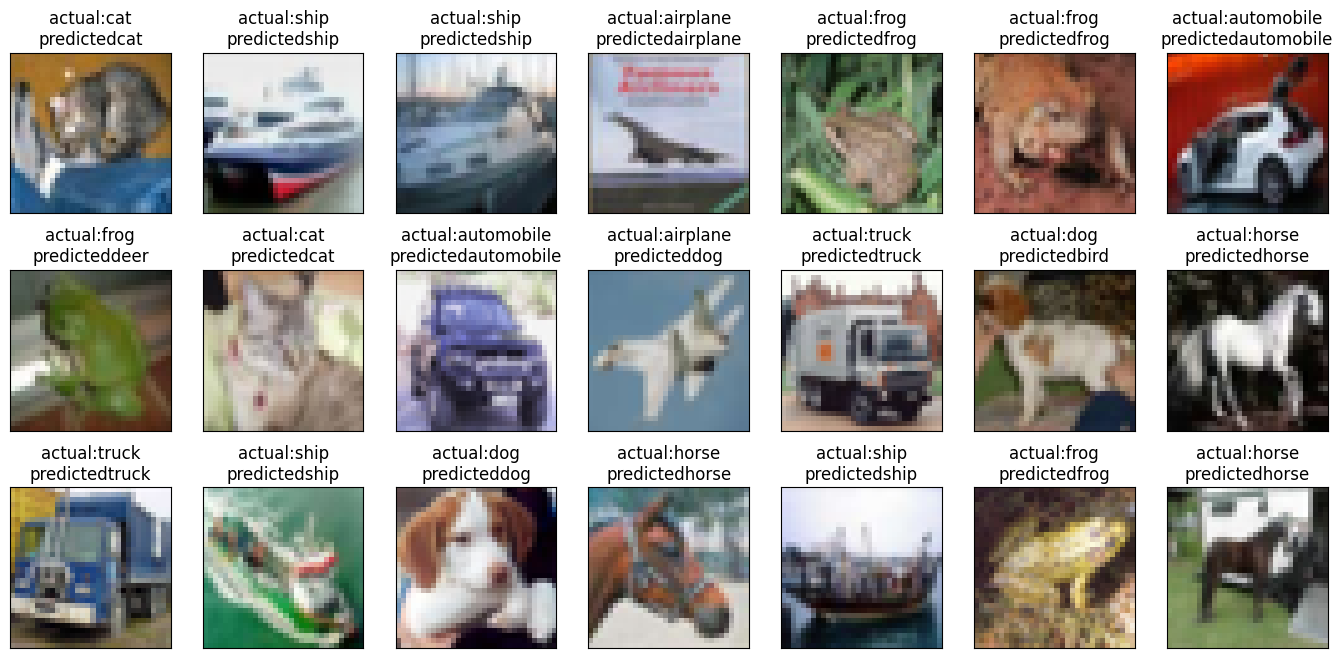

In [116]:
y_test = y_test.astype(int)
prediction = prediction.astype(int)

fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False, sharey=True, figsize=(17,8))
index = 0

for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + labels[y_test[index]] + '\n' 
                            + 'predicted' + labels[prediction[index]])
        axes[i,j].imshow(x_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index +=1
plt.show()        
